# Build temporal network of PPI from protein concentrations

Here, we build a temporal network of protein-protein interactions, for the budding yeast cell cycle, from a static network of PPI and edge times series.

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sb

import phasik as pk

sb.set_context("paper")

## 1. Load static network

In [3]:
static_net_filepath = "../data/kegg/static_PPI_network_KEGG.adjlist"
static_network = nx.read_adjlist(static_net_filepath)  # networkx Graph object

pk.graph_size_info(static_network)

'83 nodes and 159 edges'

In [4]:
# plot static PPI network
# fig, ax = plt.subplots(figsize=(18, 15))

# draw_graph(static_network, ax=ax, color='silver')
# plt.show()

## 2. Load edge times series

In [5]:
edge_activity_filepath = "../data/chen/edge_time_series_normed.csv"
norm = True

# use this for non-normalised time series
# edge_activity_filepath = "data/chen/edge_time_series.csv"
# norm = False

edge_series = pd.read_csv(edge_activity_filepath).transpose()
times = list(edge_series.columns)

edge_series.head()

0         1         2         3         4         5    \
BUB2-TEM1   1.000000  0.944640  0.821809  0.714192  0.616431  0.526373   
CDC14-CDH1  0.686659  1.000000  0.907541  0.820039  0.766979  0.705793   
CDC14-NET1  0.645917  0.671144  0.714681  0.731195  0.747004  0.768939   
CDC14-SIC1  0.018796  0.052740  0.205271  0.506905  0.762640  0.932310   
CDC14-SWI5  0.979236  1.000000  0.774786  0.653575  0.569462  0.487680   

                 6         7         8         9    ...       92        93   \
BUB2-TEM1   0.443475  0.367971  0.300570  0.242267  ...  1.000000  1.000000   
CDC14-CDH1  0.627266  0.531560  0.427561  0.325439  ...  0.001641  0.002252   
CDC14-NET1  0.796495  0.825434  0.855900  0.876039  ...  0.994226  0.988840   
CDC14-SIC1  1.000000  0.961426  0.844510  0.683152  ...  0.000500  0.000602   
CDC14-SWI5  0.403337  0.318311  0.238636  0.169497  ...  0.110348  0.127783   

                 94        95        96        97        98        99   \
BUB2-TEM1   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
CDC14-CDH1  0.003354  0.005618  0.010949  0.024823  0.061775  0.150247   
CDC14-NET1  0.977254  0.962266  0.933738  0.890852  0.830224  0.766072   
CDC14-SIC1  0.000754  0.000999  0.001407  0.002092  0.003217  0.005076   
CDC14-SWI5  0.153343  0.193334  0.256378  0.352987  0.486287  0.645238   

                 100       101  
BUB2-TEM1   1.000000  1.000000  
CDC14-CDH1  0.325150  0.609259  
CDC14-NET1  0.706295  0.655787  
CDC14-SIC1  0.008461  0.016047  
CDC14-SWI5  0.807102  0.951225  

[5 rows x 102 columns]

## 3. Build temporal network

In [6]:
# this function buils a TemporalNetwork, by integrating the edge time series to the static network,
# and setting a constant default weight value for edges for which we have no temporal information

temporal_network = pk.TemporalNetwork.from_static_network_and_edge_timeseries(
    static_network,
    edge_series,
    static_edge_default_weight=1,
    quiet=False,  # if True, prints less information
)

A PartiallyTemporalNetwork is created instead.
Edges with no temporal information:
{('BUB1', 'BUB3'), ('CHK1', 'MEC1'), ('CDC4', 'SCF'), ('CLN3', 'PCL2'), ('MEC3', 'RAD17'), ('DDC1', 'RAD24'), ('PHO81', 'PHO85'), ('DDC2', 'MRC1'), ('CDC28', 'PCL2'), ('CDC14', 'DBF2'), ('APC', 'MAD3'), ('CHK1', 'PDS1'), ('PHO11', 'PHO4'), ('FOB1', 'SPO12'), ('APC', 'CLB6'), ('DUN1', 'RFX1'), ('MCM', 'TAH11'), ('MEC1', 'RAD24'), ('SWI6', 'YHP1'), ('Cohesin', 'ESP1'), ('MCM', 'ORC'), ('CDC20', 'MAD3'), ('DBF2', 'MOB1'), ('CLN1', 'SCF'), ('CDC14', 'MOB1'), ('RAD53', 'RAD9'), ('CAK1', 'CDC28'), ('CDC4', 'CDC6'), ('CDC6', 'TAH11'), ('CDC6', 'SCF'), ('SWI4', 'YHP1'), ('BUB2', 'CDC5'), ('APC', 'CLB1'), ('SCF', 'SWE1'), ('CDC6', 'ORC'), ('BUB3', 'CDC20'), ('PHO4', 'PHO85'), ('CDC28', 'FAR1'), ('MEC1', 'RAD9'), ('DDC1', 'RAD17'), ('CAK1', 'CLB1'), ('CLN1', 'WHI5'), ('MRC1', 'RAD53'), ('APC', 'CDC20'), ('BUB3', 'MAD3'), ('CDC5', 'SWE1'), ('CDC28', 'CKS1'), ('CDC55', 'NET1'), ('SCF', 'SIC1'), ('BFA1', 'CDC5'), ('C

In [7]:
print(f"Temporal network shape (N, T): {temporal_network.shape()}")
print(pk.graph_size_info(static_network))
print(f"Number of temporal edges: {temporal_network.number_of_temporal_edges()}")

Temporal network shape (N, T): (83, 102)
83 nodes and 159 edges
Number of temporal edges: 34


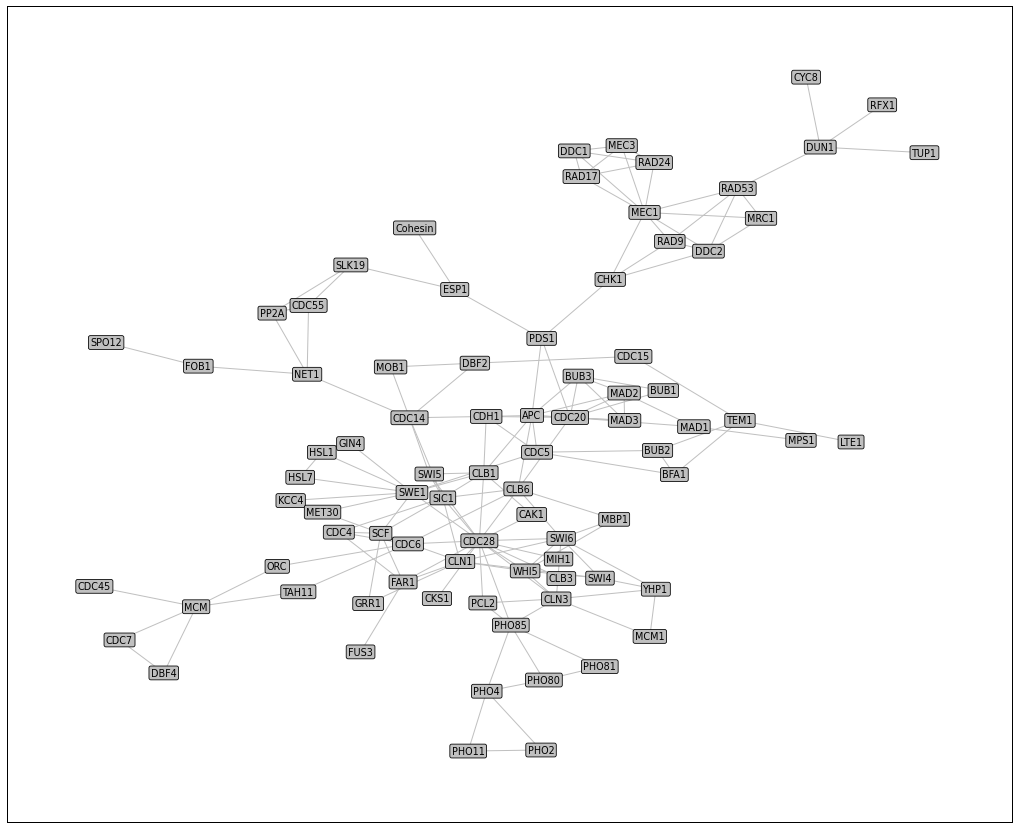

In [8]:
# plot static PPI network
G = temporal_network.aggregated_network(output="normalised")

fig, ax = plt.subplots(figsize=(18, 15))

pk.draw_graph(G, ax=ax, color="silver")
plt.show()

### 3.1 Animate temporal network

In [9]:
%matplotlib

Using matplotlib backend: <object object at 0x108899540>


In [10]:
fig, ax = plt.subplots(figsize=(12, 12))

ani = pk.animate_temporal_network(
    temporal_network,
    color_temporal="red",
    width_scale=3,
    with_labels=False,
    interval=20,
    ax=ax,
)

In [ ]:
# save the animation
filepath = "temporal_network_cell_cycle.mp4"
fps = 5
ani.save(filepath, fps=fps)

MovieWriter ffmpeg unavailable; using Pillow instead.
